# Wheat price 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv("../grain-price-data/interim/priceCereals_DK_monthly_interim.csv")
df['period'] = pd.to_datetime(df['period'],format='%Y %B')
#df = df.set_index('period')
df = df.loc[(df['period'] < datetime.datetime(2012,1,1))]
#series = df['wheat']
#print(series)


## Visualization
Let's start with plotting the monthly wheat prices from january 2000 to december 2011

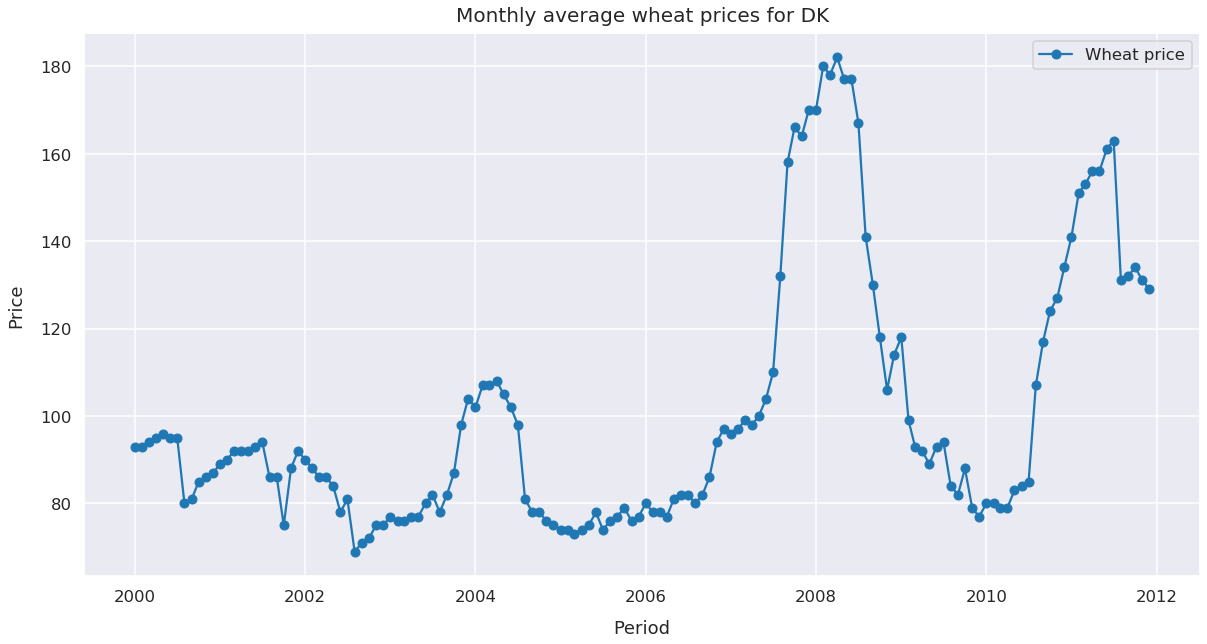

In [4]:

plt.title("Monthly average wheat prices for DK", y=1.01, fontsize=20)
plt.rcParams['figure.figsize'] = [20,10]
ax = plt.axes()
plt.ylabel("Price", labelpad=15)
plt.xlabel("Period", labelpad=15)
#ax = plt.axes()
#ax.set_xticks(years)
plt.plot(df['period'], df["wheat"], 'o-', label='Wheat price')
plt.legend()
plt.show()

### Decomposition
Using Statsmodels to decompose the time series into its components and trying out some different periods. The obvious starting point is 12 as it is the number of observations each year. Farmers have a 2.5 year time frame to sell their harvest, so the number of observations in this period is 30 and might be worth a try.

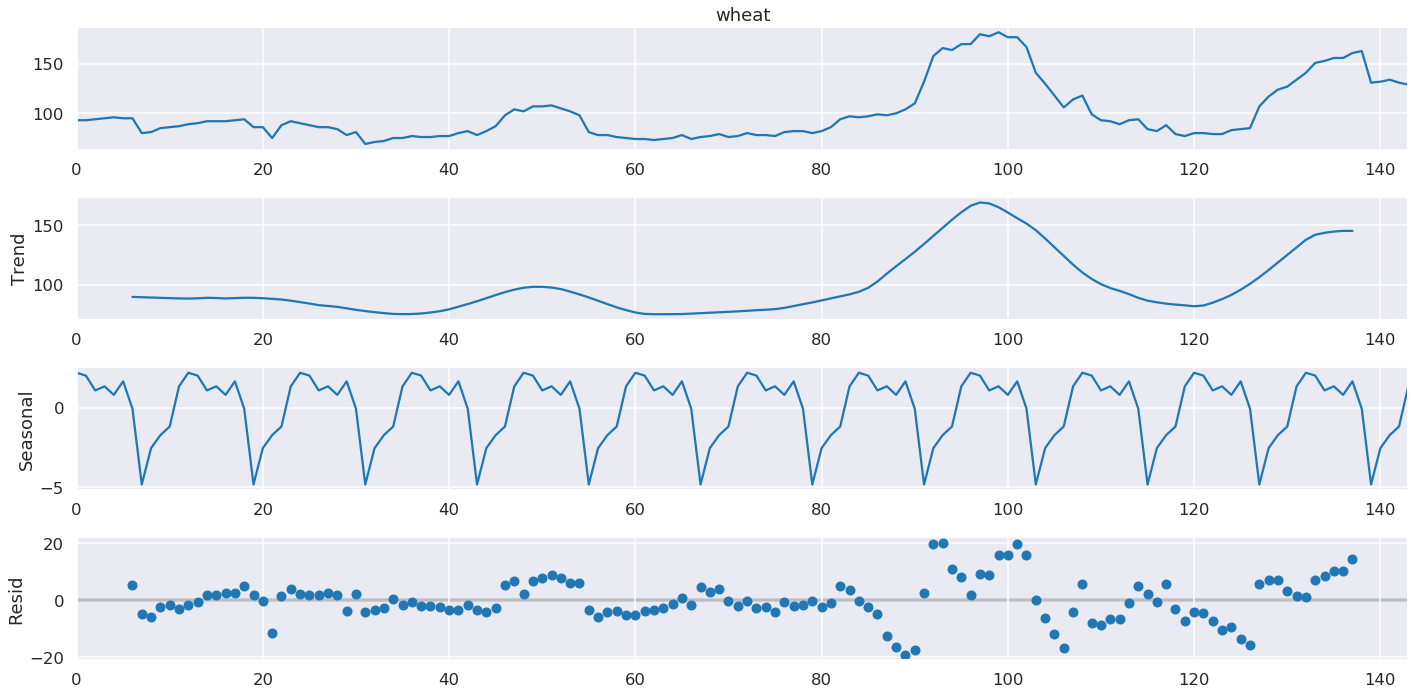

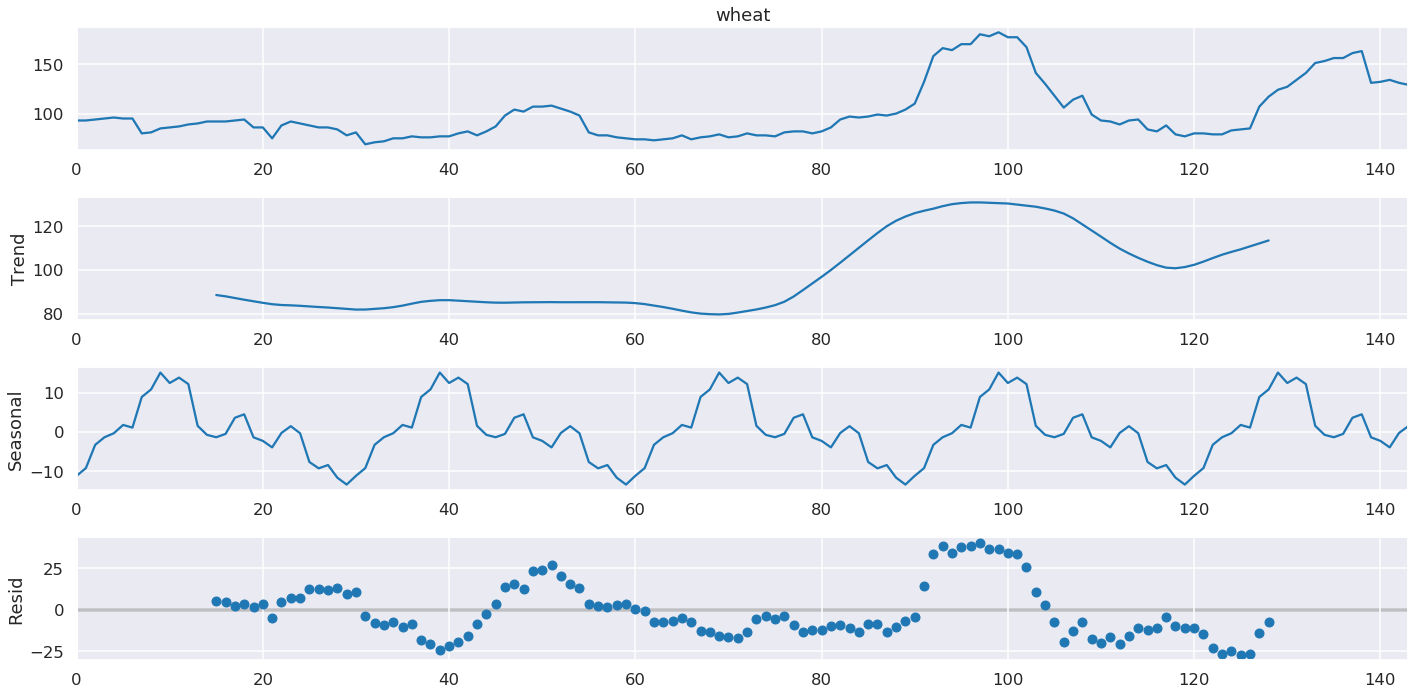

In [7]:
decomposed = seasonal_decompose(df['wheat'], model='additive', period=12)
decomposed.plot()
plt.rcParams['figure.figsize'] = [20,10]
plt.show()

decomposed = seasonal_decompose(df['wheat'], model='additive', period=30)
decomposed.plot()
plt.rcParams['figure.figsize'] = [20,10]
plt.show()